## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import statsmodels as st

In [2]:
pd.options.display.max_columns = False

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **1. Data**

In [4]:
daily_temperature = pd.read_csv(
    '../../Data/daily-minimum-temperatures.csv', 
    index_col=0, 
    parse_dates=True
)

daily_temperature.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [5]:
daily_temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [6]:
# Podemos filtrar en función de las fechas
daily_temperature.loc['1981-01']

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


## **2. Basic Feature Engineering**

### **Date Time Features**

In [7]:
# Agregamos las dimensiones del tiempo
daily_temperature['Year'] =daily_temperature.index.year
daily_temperature['Month'] =daily_temperature.index.month
daily_temperature['Day'] =daily_temperature.index.day

daily_temperature.sample()

,Temperature,Year,Month,Day
Date,,,,
1989-12-28,11.7,1989,12,28


In [8]:
daily_temperature = daily_temperature.reindex(['Year', 'Month', 'Day', 'Temperature'], axis=1)
daily_temperature.head()

,Year,Month,Day,Temperature
Date,,,,
1981-01-01,1981,1,1,20.7
1981-01-02,1981,1,2,17.9
1981-01-03,1981,1,3,18.8
1981-01-04,1981,1,4,14.6
1981-01-05,1981,1,5,15.8


### **Lag Features**

In [9]:
daily_temperature['Temp-1'] = daily_temperature['Temperature'].shift(1)
daily_temperature['Temp-2'] = daily_temperature['Temperature'].shift(2)
daily_temperature['Temp-3'] = daily_temperature['Temperature'].shift(3)

In [10]:
daily_temperature = daily_temperature.reindex(['Year', 'Month', 'Day','Temp-3', 'Temp-2', 'Temp-1','Temperature'], axis=1)
daily_temperature.head()

,Year,Month,Day,Temp-3,Temp-2,Temp-1,Temperature
Date,,,,,,,
1981-01-01,1981,1,1,NaN,NaN,NaN,20.7
1981-01-02,1981,1,2,NaN,NaN,20.7,17.9
1981-01-03,1981,1,3,NaN,20.7,17.9,18.8
1981-01-04,1981,1,4,20.7,17.9,18.8,14.6
1981-01-05,1981,1,5,17.9,18.8,14.6,15.8


### **Rolling Window Statistics**

In [11]:
# Calculamos la media movil de nuestras observaciones pasadas
daily_temperature['mean_window_2'] = daily_temperature['Temp-1'].rolling(window=2).mean()
daily_temperature = daily_temperature.reindex(
    ['Year', 'Month', 'Day','Temp-3', 'Temp-2', 'Temp-1', 'mean_window_2', 'Temperature'],
    axis=1
)
daily_temperature.head()

,Year,Month,Day,Temp-3,Temp-2,Temp-1,mean_window_2,Temperature
Date,,,,,,,,
1981-01-01,1981,1,1,NaN,NaN,NaN,NaN,20.7
1981-01-02,1981,1,2,NaN,NaN,20.7,NaN,17.9
1981-01-03,1981,1,3,NaN,20.7,17.9,19.30,18.8
1981-01-04,1981,1,4,20.7,17.9,18.8,18.35,14.6
1981-01-05,1981,1,5,17.9,18.8,14.6,16.70,15.8


### **Expanding Window Statistics**

In [12]:
# De igual forma, podemos realizar calculos con el historial de nuestra serie de tiempo
daily_temperature['mean_expanding'] = daily_temperature['Temp-1'].expanding().mean()
daily_temperature = daily_temperature.reindex(
    ['Year', 'Month', 'Day','Temp-3', 'Temp-2', 'Temp-1', 'mean_window_2', 'mean_expanding','Temperature'],
    axis=1
)
daily_temperature.head()

,Year,Month,Day,Temp-3,Temp-2,Temp-1,mean_window_2,mean_expanding,Temperature
Date,,,,,,,,,
1981-01-01,1981,1,1,NaN,NaN,NaN,NaN,NaN,20.7
1981-01-02,1981,1,2,NaN,NaN,20.7,NaN,20.700000,17.9
1981-01-03,1981,1,3,NaN,20.7,17.9,19.30,19.300000,18.8
1981-01-04,1981,1,4,20.7,17.9,18.8,18.35,19.133333,14.6
1981-01-05,1981,1,5,17.9,18.8,14.6,16.70,18.000000,15.8


## **3. Visualization**

### **Line Plots**

<Axes: xlabel='Date'>

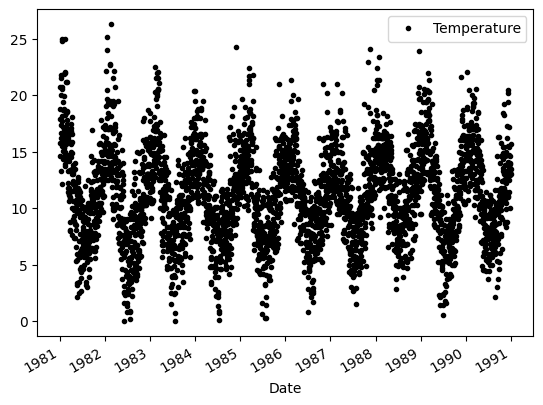

In [13]:
daily_temperature[['Temperature']].plot(style='k.')

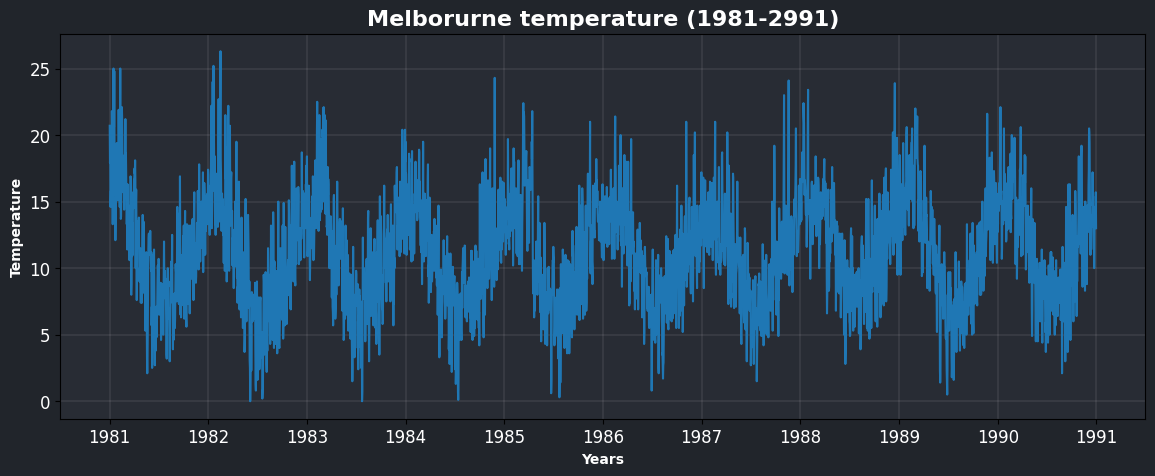

In [14]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Melborurne temperature (1981-2991)', size=16, color='white', weight=700)
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(daily_temperature['Temperature'])

plt.xlabel('Years', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Temperature', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

In [15]:
daily_temperature['Temperature'].groupby(pd.Grouper(freq='1Y')).mean()

C:\Users\jmart\AppData\Local\Temp\ipykernel_30072\3856433472.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  daily_temperature['Temperature'].groupby(pd.Grouper(freq='1Y')).mean()


Date
1981-12-31    11.517260
1982-12-31    10.783562
1983-12-31    11.187397
1984-12-31    10.591781
1985-12-31    11.137534
1986-12-31    10.803288
1987-12-31    10.853151
1988-12-31    11.972055
1989-12-31    11.261918
1990-12-31    11.669589
Freq: YE-DEC, Name: Temperature, dtype: float64

In [16]:
groups = daily_temperature['Temperature'].groupby(pd.Grouper(freq='YE'))

In [17]:
years = pd.DataFrame()

for name, group in groups:
    # print(name.year, group.values)
    years[name.year] = group.values

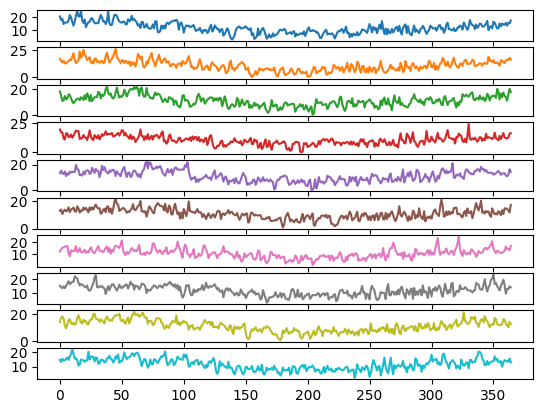

In [18]:
years.plot(subplots=True, legend=False)

plt.show()

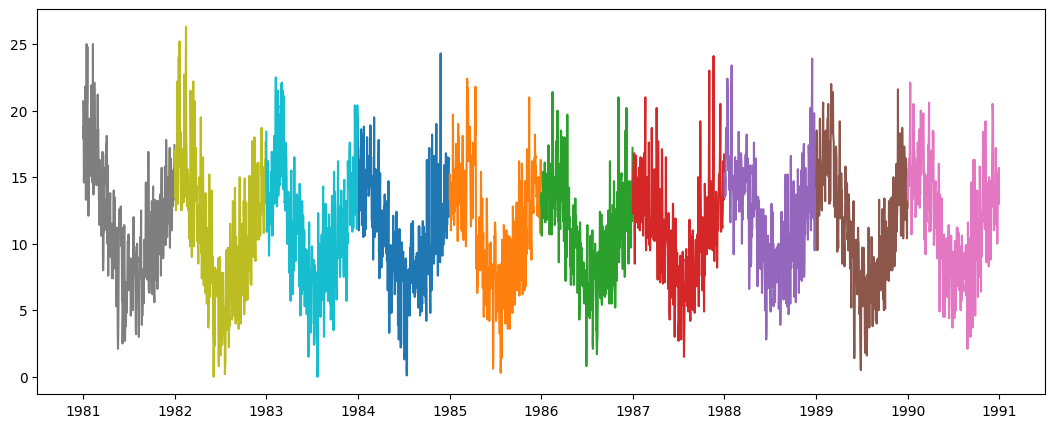

In [19]:
fig, ax =plt.subplots(figsize=(13, 5))

for i in set(daily_temperature['Year']):
    plt.plot(daily_temperature.query(f'Year == {i}')[['Temperature']])


plt.show()

### **Histogram and density Plots**

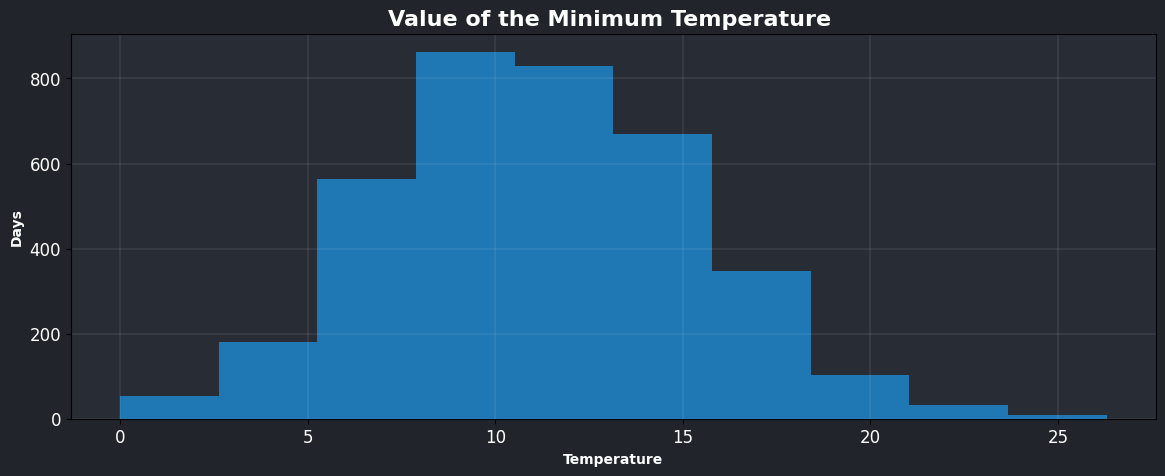

In [20]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Value of the Minimum Temperature ', size=16, color='white', weight=700)
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

ax.hist(daily_temperature['Temperature'])

plt.xlabel('Temperature', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Days', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

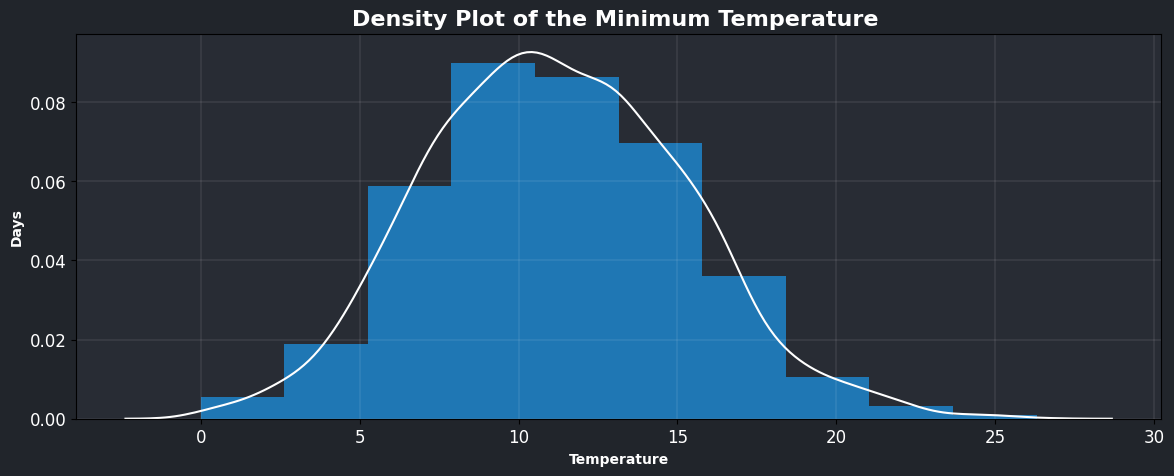

In [21]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Density Plot of the Minimum Temperature ', size=16, color='white', weight=700)
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

ax.hist(daily_temperature['Temperature'], density=True)
sns.kdeplot(daily_temperature['Temperature'], ax=ax, color='white')

plt.xlabel('Temperature', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Days', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

### **Box and Whisker Plots**

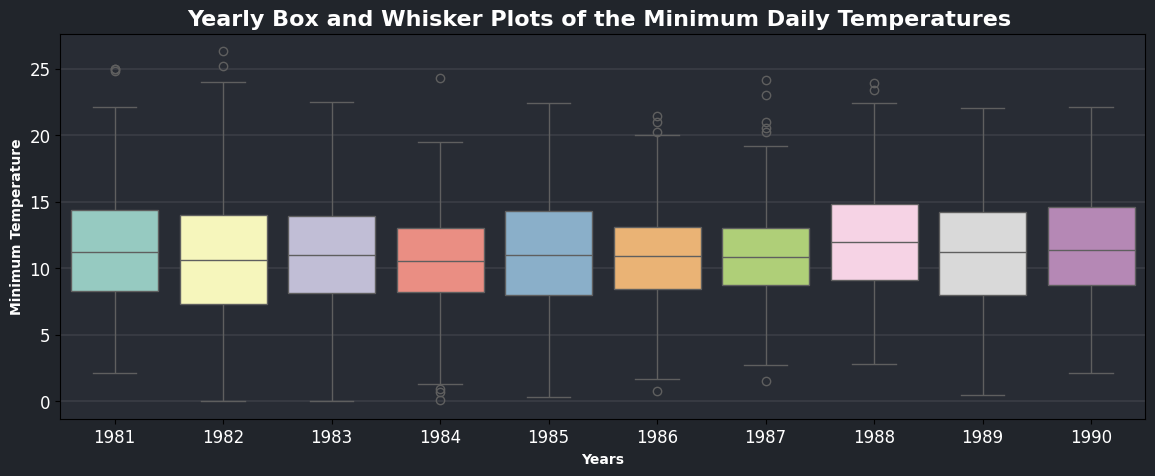

In [22]:

fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Yearly Box and Whisker Plots of the Minimum Daily Temperatures ', size=16, color='white', weight=700)
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

sns.boxplot(
    data=daily_temperature,
    x='Year', 
    y='Temperature',
    hue='Year',
    palette='Set3'
)

plt.xlabel('Years', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Minimum Temperature', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

ax.legend_.remove()

plt.show()

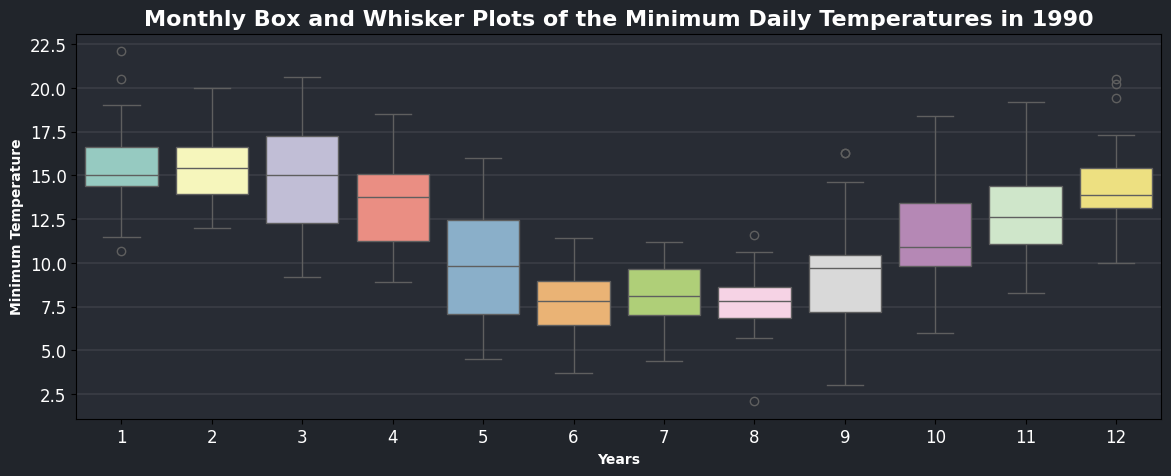

In [23]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.title('Monthly Box and Whisker Plots of the Minimum Daily Temperatures in 1990', size=16, color='white', weight=700)
plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

sns.boxplot(
    data=daily_temperature.query('Year == 1990'),
    x='Month', 
    y='Temperature',
    hue='Month',
    palette='Set3'
)

plt.xlabel('Years', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Minimum Temperature', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

ax.legend_.remove()

plt.show()

### **Heat Maps**

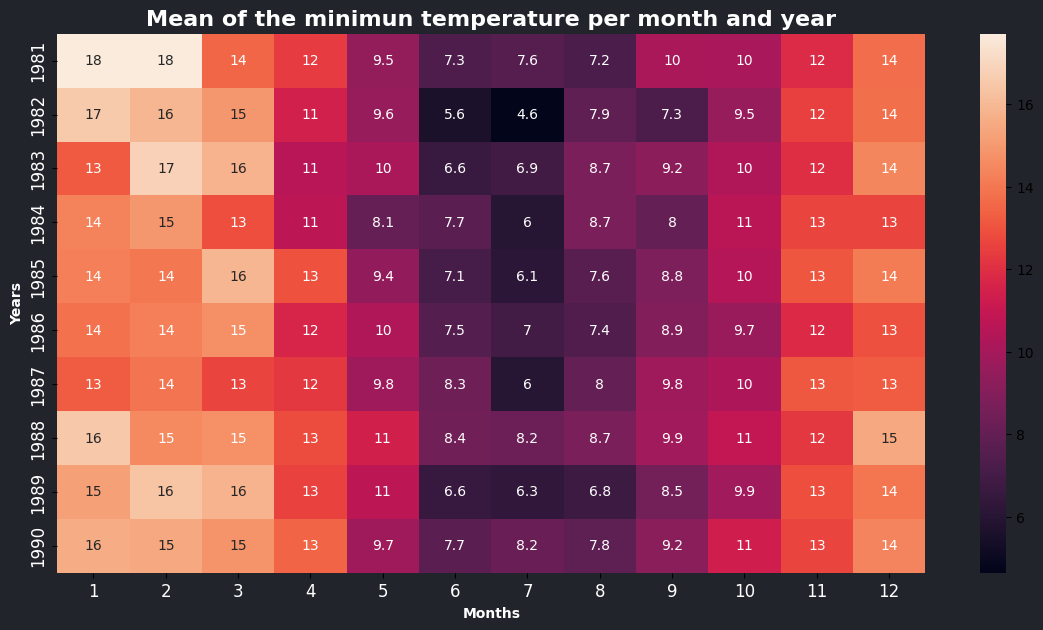

In [24]:
fig, ax = plt.subplots(figsize=(14,7))
plt.title('Mean of the minimun temperature per month and year', size=16, color='white', weight=700)
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

sns.heatmap(pd.crosstab(
    index=daily_temperature['Year'],
    columns=daily_temperature['Month'],
    values=daily_temperature['Temperature'],
    aggfunc='mean'
), annot=True)


plt.xlabel('Months', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Years', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

### **Lag Plots or Scatter Plots**

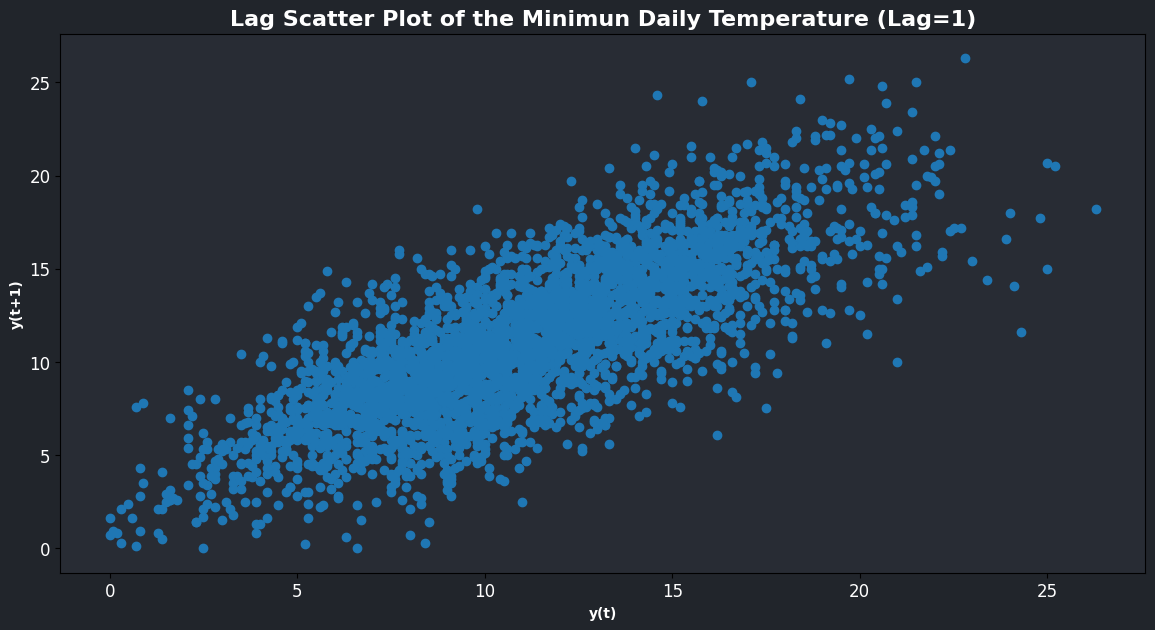

In [47]:
fig, ax = plt.subplots(figsize=(14,7))
plt.title('Lag Scatter Plot of the Minimun Daily Temperature (Lag=1)', size=16, color='white', weight=700)
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

pd.plotting.lag_plot(
    daily_temperature['Temperature'], 
    lag=1
)

plt.xlabel('y(t)', size=10, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('y(t+1)', size=10, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

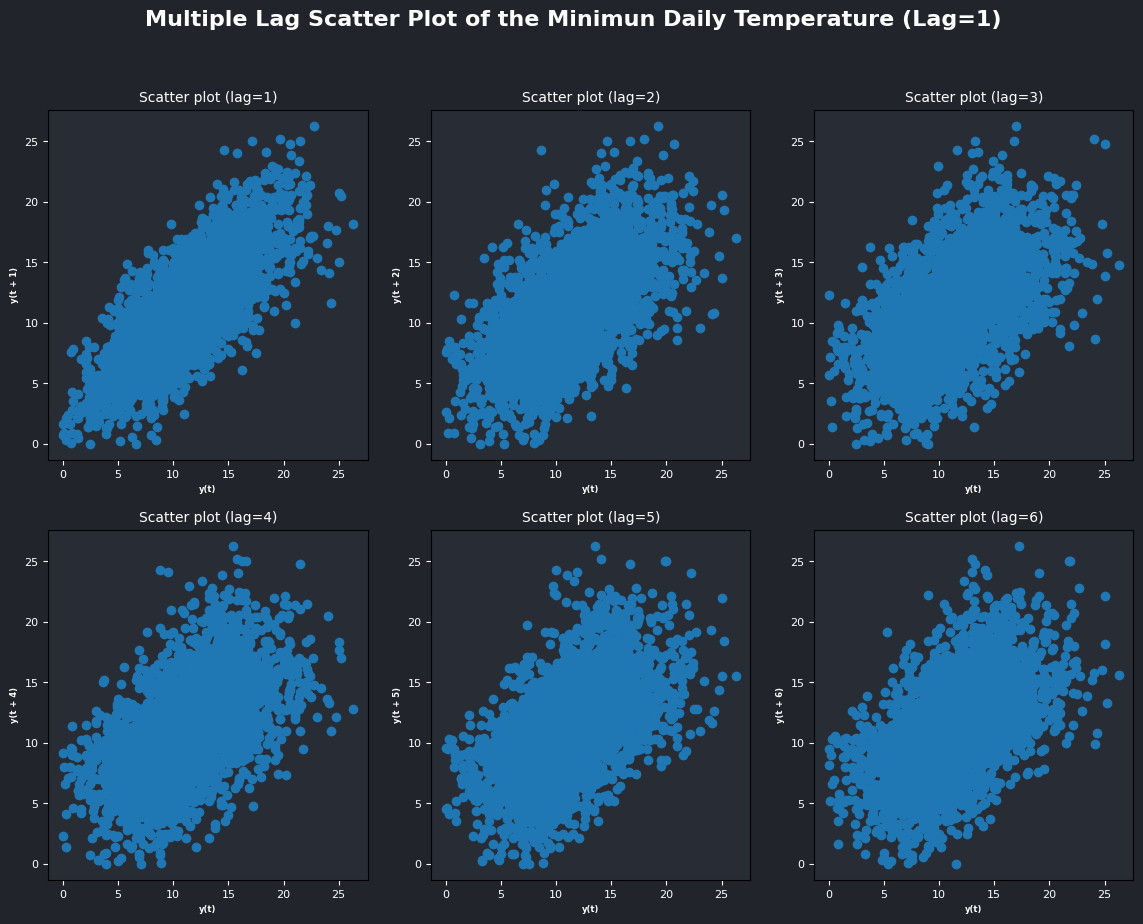

In [89]:
fig, ax = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('Multiple Lag Scatter Plot of the Minimun Daily Temperature (Lag=1)', size=16, color='white', weight=700)
fig.patch.set_facecolor('#21252b') 

lags = [1, 2, 3, 4, 5, 6]

for i in range(2):
    for j in range(3):

        lag = lags[i * 3 + j]

        ax[i, j].set_title(f'Scatter plot (lag={lag})', color='white', size=10)
        ax[i, j].set_facecolor('#282c34') 
        ax[i, j].set_xlabel('y(t)', size=6, weight=700, color='white')
        ax[i, j].set_ylabel('y(t+1)', size=6, weight=700, color='white')
        ax[i, j].tick_params(axis='x', colors='white', labelsize=8)
        ax[i, j].tick_params(axis='y', colors='white', labelsize=8)

        pd.plotting.lag_plot(
            daily_temperature['Temperature'], 
            lag=lag,
            ax=ax[i, j]
        )

plt.show()

### **Autocorrelation Plots**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

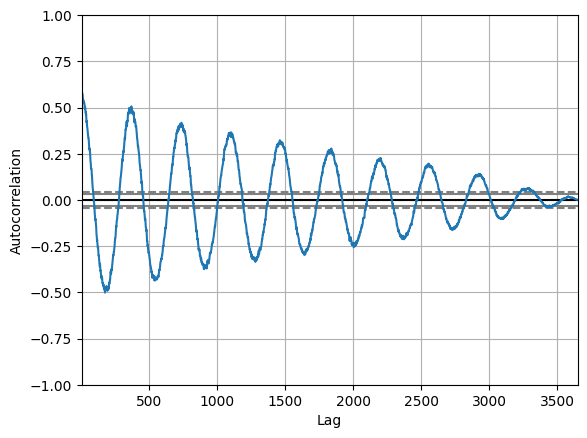

In [91]:
pd.plotting.autocorrelation_plot(daily_temperature['Temperature'])

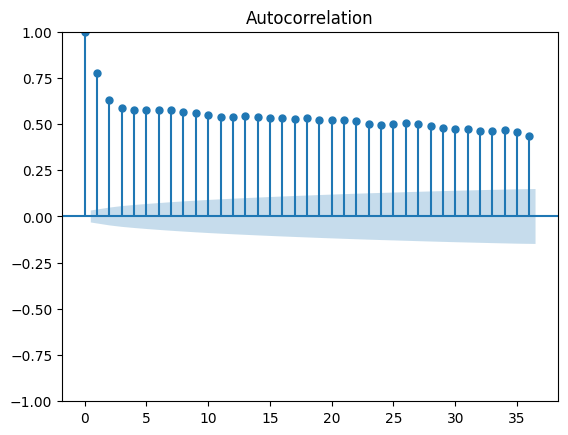

In [100]:
acf = plot_acf(
    daily_temperature['Temperature'],
    # lags=360
)

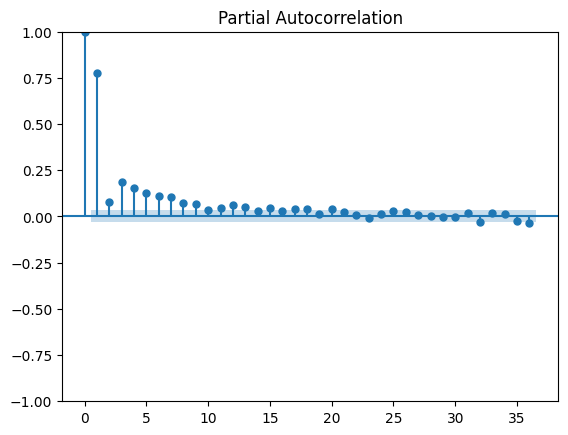

In [99]:
pca = plot_pacf(
    daily_temperature['Temperature'],
    # lags=360
)